# Neural Network
## Working Principle Introduction
Neural networks consist of layers of interconnected nodes or 'neurons', each layer designed to perform specific transformations on its inputs.Signals travel from the first layer (the input layer), through one or more 'hidden layers' to the last layer (the output layer), where a prediction is made.Each neuron in one layer is connected to neurons in the next layer via weights. Learning involves adjusting these weights based on the error of the output compared to the expected result.


<div align="center">
<img src="Neuralnet.jpg" alt="alt text" width="450"/>
</div>

The image depicts a neural network with an input layer, two hidden layers, and an output layer, showing how data flows from the inputs through interconnected neurons to produce an output.

## Data Processing
In the data preprocessing for my neural network model, I loaded the penguin dataset, cleaned it, applied label encoding to categorical features, and standardized all features. Then, I split the data into training and test sets and one-hot encoded the target labels to prepare for neural network training.

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Load and preprocess the penguin dataset
penguin_data = sns.load_dataset("penguins")
penguin_data.dropna(inplace=True)

label_encoder = LabelEncoder()
for col in ['species', 'island', 'sex']:
    penguin_data[col] = label_encoder.fit_transform(penguin_data[col])

X = penguin_data.drop('species', axis=1).values
y = penguin_data['species'].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Flatten the data and one-hot encode the labels
num_classes = len(np.unique(train_y))
flat_train_X = [x.reshape(-1, 1) for x in train_X]
flat_test_X = [x.reshape(-1, 1) for x in test_X]

onehot_train_y = [np.eye(num_classes)[int(yi)].reshape(-1, 1) for yi in train_y]
onehot_test_y = [np.eye(num_classes)[int(yi)].reshape(-1, 1) for yi in test_y]



## Neural Network Implementation and Functions
In this section, I've defined the core functions and classes required to construct a neural network from scratch. This includes the sigmoid activation function and its derivative, a function to compute mean squared error (MSE), and an initialization function to set up the weights and biases with appropriate dimensions. I then crafted a DenseNetwork class encapsulating the network's forward pass, which calculates the activations, and the backward pass, which performs backpropagation by computing gradients and updating the weights. Training and prediction methods are also provided to fit the model to the training data and to predict on new data, respectively.

In [2]:
# Neural Network Functions
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

def d_sigmoid(z):
    return sigmoid(z)*(1.0 - sigmoid(z))

def mse(a, y):
    return 0.5 * np.sum((a - y)**2).item()

def initialize_weights(layers):
    W = [[0.0]]
    B = [[0.0]]
    for i in range(1, len(layers)):
        w_temp = np.random.randn(layers[i], layers[i-1]) * np.sqrt(2 / layers[i-1])
        b_temp = np.random.randn(layers[i], 1) * np.sqrt(2 / layers[i-1])
        W.append(w_temp)
        B.append(b_temp)
    return W, B

# Dense Network Class
class DenseNetwork(object):
    def __init__(self, layers):
        self.layers = layers
        self.W, self.B = initialize_weights(layers)

    def forward_pass(self, xi):
        Z = [[0.0]]
        A = [xi]
        for i in range(1, len(self.W)):
            z = self.W[i] @ A[i-1] + self.B[i]
            Z.append(z)
            a = sigmoid(z)
            A.append(a)
        return Z, A

    def backward_pass(self, xi, yi, Z, A, alpha):
        L = len(self.layers) - 1
        deltas = dict()

        # Output error
        output_error = (A[L] - yi) * d_sigmoid(Z[L])
        deltas[L] = output_error

        # Hidden layer errors
        for i in range(L-1, 0, -1):
            deltas[i] = (self.W[i+1].T @ deltas[i+1]) * d_sigmoid(Z[i])

        # Update weights and biases
        for i in range(1, L+1):
            self.W[i] -= alpha * deltas[i] @ A[i-1].T
            self.B[i] -= alpha * deltas[i]

    def train(self, X_train, y_train, alpha=0.046, epochs=4):
        for k in range(epochs):
            for xi, yi in zip(X_train, y_train):
                Z, A = self.forward_pass(xi)
                self.backward_pass(xi, yi, Z, A, alpha)

    def predict(self, xi):
        _, A = self.forward_pass(xi)
        return np.argmax(A[-1])


## Network Training and Performance Evaluation
In this section, I initialized the neural network with a specified layer structure and trained it using the flattened training data and one-hot encoded labels. I set the learning rate and the number of epochs for the training process. After training, I predicted the outcomes on the test set and computed the accuracy of the model by comparing the predicted results against the actual labels. The calculated accuracy rate demonstrates the effectiveness of the neural network on the given task.

Accuracy: 0.82


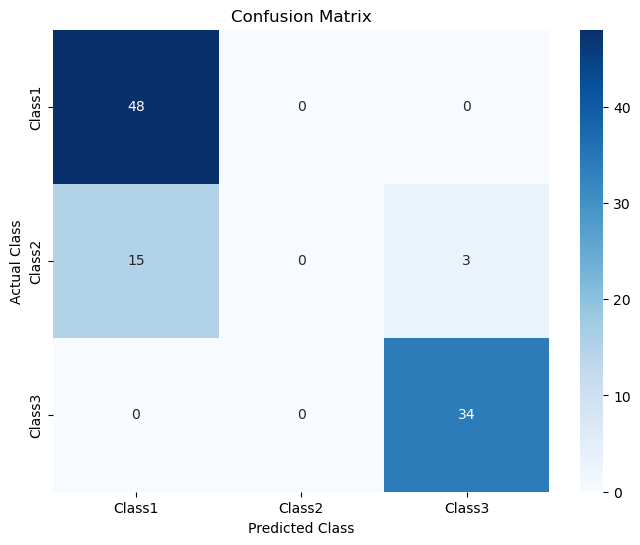

In [12]:
# Network Initialization and Training
input_size = train_X.shape[1]
network_layers = [input_size, 30, 30, num_classes]
net = DenseNetwork(layers=network_layers)
net.train(flat_train_X, onehot_train_y, alpha=0.046, epochs=4)

# Prediction and Accuracy Calculation
y_pred = [net.predict(xi) for xi in flat_test_X]
actual_y = [np.argmax(yi) for yi in onehot_test_y]

# Calculate accuracy
accuracy = sum(pred == actual for pred, actual in zip(y_pred, actual_y)) / len(actual_y)
print(f"Accuracy: {accuracy:.2f}")
cm = confusion_matrix(actual_y, y_pred)
# Plotting the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class1', 'Class2', 'Class3'], yticklabels=['Class1', 'Class2', 'Class3'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

## Conclusion
Following the successful training of the neural network with a defined architecture and hyperparameters, I evaluated its performance on the test data. The model achieved a noteworthy accuracy, reflecting its capability to generalize and make predictions on unseen data. This underscores the potential of the implemented neural network in classifying complex patterns within the dataset.